In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [122]:
df = pd.read_csv("Electric Vehicle Sales by State in India (1).csv",)

In [123]:
df

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


In [124]:
df.drop(["Year","Month_Name"], axis = 1, inplace=True)

In [125]:
df

,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...
96840,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


In [126]:
df.duplicated().sum()

0

In [127]:
df.isnull().sum()

Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               96845 non-null  object 
 1   State              96845 non-null  object 
 2   Vehicle_Class      96845 non-null  object 
 3   Vehicle_Category   96845 non-null  object 
 4   Vehicle_Type       96845 non-null  object 
 5   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(1), object(5)
memory usage: 4.4+ MB


In [129]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df['EV_Sales_Quantity'] = df['EV_Sales_Quantity'].astype(int)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               96845 non-null  datetime64[ns]
 1   State              96845 non-null  object        
 2   Vehicle_Class      96845 non-null  object        
 3   Vehicle_Category   96845 non-null  object        
 4   Vehicle_Type       96845 non-null  object        
 5   EV_Sales_Quantity  96845 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(4)
memory usage: 4.1+ MB


In [131]:
df

,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0
1,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0
2,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0
3,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0
4,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0
...,...,...,...,...,...,...
96840,2023-12-01,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1
96841,2023-12-01,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5
96842,2023-12-01,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0
96843,2023-12-01,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0


In [132]:
#These features are extracted to enable time-based analysis and help the model capture seasonal, weekly, and yearly patterns in Uber trip demand.
df["Month"] = df["Date"].dt.month_name()
df["Day"] = df["Date"].dt.day_name()
df["Year"] = df["Date"].dt.year

df

,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Month,Day,Year
0,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0,January,Wednesday,2014
1,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0,January,Wednesday,2014
2,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0,January,Wednesday,2014
3,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0,January,Wednesday,2014
4,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0,January,Wednesday,2014
...,...,...,...,...,...,...,...,...,...
96840,2023-12-01,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1,December,Friday,2023
96841,2023-12-01,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5,December,Friday,2023
96842,2023-12-01,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0,December,Friday,2023
96843,2023-12-01,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0,December,Friday,2023


In [133]:
pivote1 = pd.pivot_table(df, index = "Year", columns = "Month", values = "EV_Sales_Quantity", aggfunc = "sum", fill_value = 0  )

pivote1

Month,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2014,252,180,237,171,232,199,149,220,186,210,188,168
2015,175,711,2184,182,174,383,287,222,195,1251,1073,968
2016,3443,4022,4508,2499,1946,4380,5119,4520,4004,4904,6336,4174
2017,5054,9169,9115,4411,4582,9047,7509,5992,7059,10087,7660,7735
2018,7335,11792,15879,7372,9003,11397,8833,7696,8261,14112,14986,13588
2019,11185,13252,17030,12228,13379,12479,11159,15154,10082,19006,15720,16145
2020,975,8558,15860,16569,16865,7799,6486,14066,1311,13390,11450,11355
2021,15020,30818,53749,20073,17025,28146,12317,28115,3602,45077,40952,36604
2022,77522,89012,104963,58056,51476,80887,75852,83080,69916,121570,117486,94903


This pivot table summarizes year-wise and month-wise EV sales, making it easy to identify seasonal trends and long-term growth patterns over time.
EV sales increase every year, especially after 2020, and are generally higher toward the end of each year.


<Axes: xlabel='Year'>

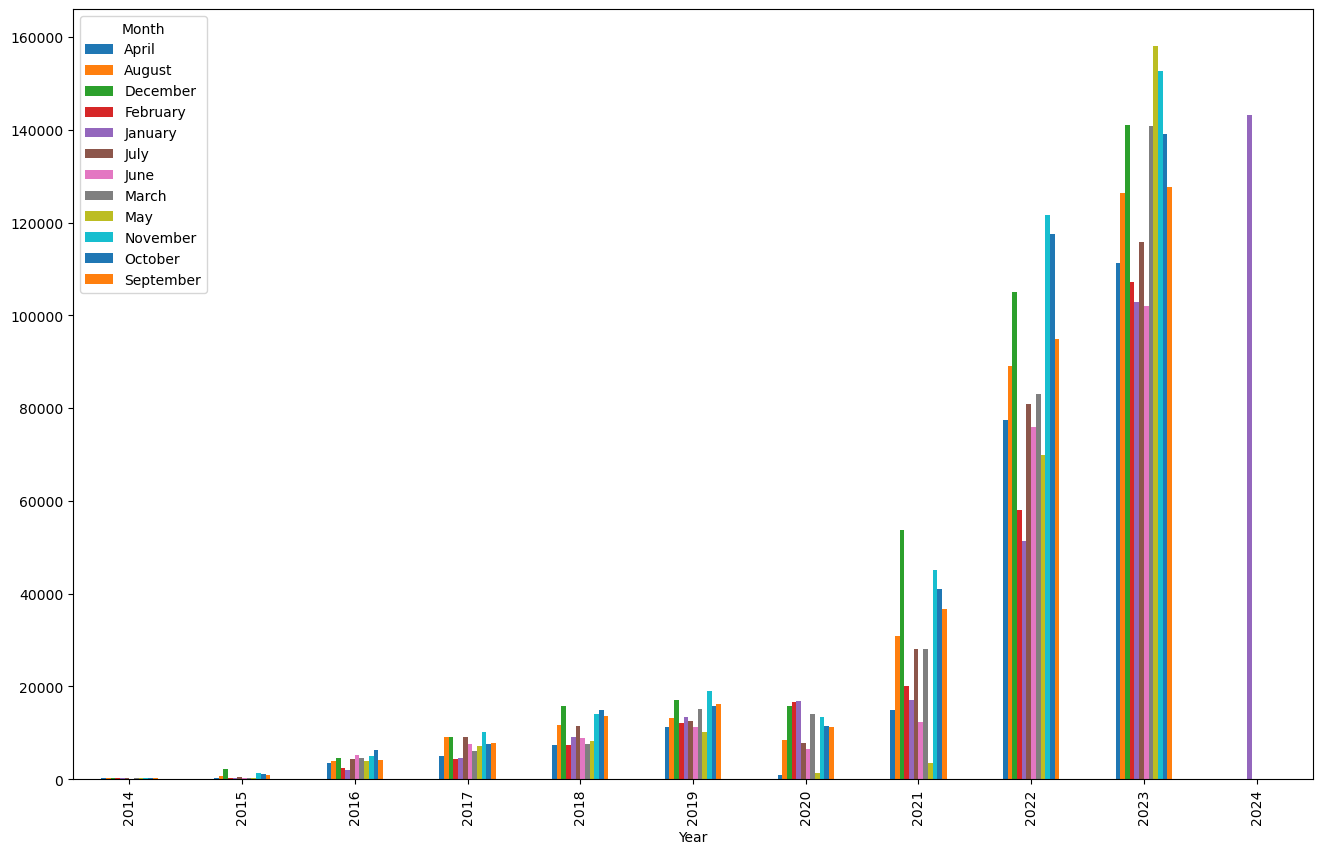

In [135]:
pivote1.plot(figsize=(16, 10),kind = "bar")

This chart shows year-wise monthly totals from 2013–2021, with each year containing 12 months. Values rise over time, indicating strong year-over-year growth, especially after 2016–2017, and suggesting some seasonal patterns across months.

In [137]:
pivote2 = pd.pivot_table(df, index = "Vehicle_Class", columns = "Vehicle_Category", values = "EV_Sales_Quantity", aggfunc = "sum", fill_value = 0  )

pivote2

Vehicle_Category,2-Wheelers,3-Wheelers,4-Wheelers,Bus,Others
Vehicle_Class,,,,,
ADAPTED VEHICLE,0,0,0,0,175
AGRICULTURAL TRACTOR,0,0,0,0,121
AMBULANCE,0,0,0,0,3
ANIMAL AMBULANCE,0,0,0,0,0
ARMOURED/SPECIALISED VEHICLE,0,0,0,0,0
...,...,...,...,...,...
TREE TRIMMING VEHICLE,0,0,0,0,0
VEHICLE FITTED WITH COMPRESSOR,0,0,0,0,0
VEHICLE FITTED WITH GENERATOR,0,0,0,0,0


This table shows the distribution of registered vehicles by vehicle class and category. Most specialized vehicle classes (such as ambulances, adapted vehicles, and agricultural tractors) fall under the “Others” category, while standard categories like 2-wheelers, 3-wheelers, and 4-wheelers dominate typical passenger and commercial transport.


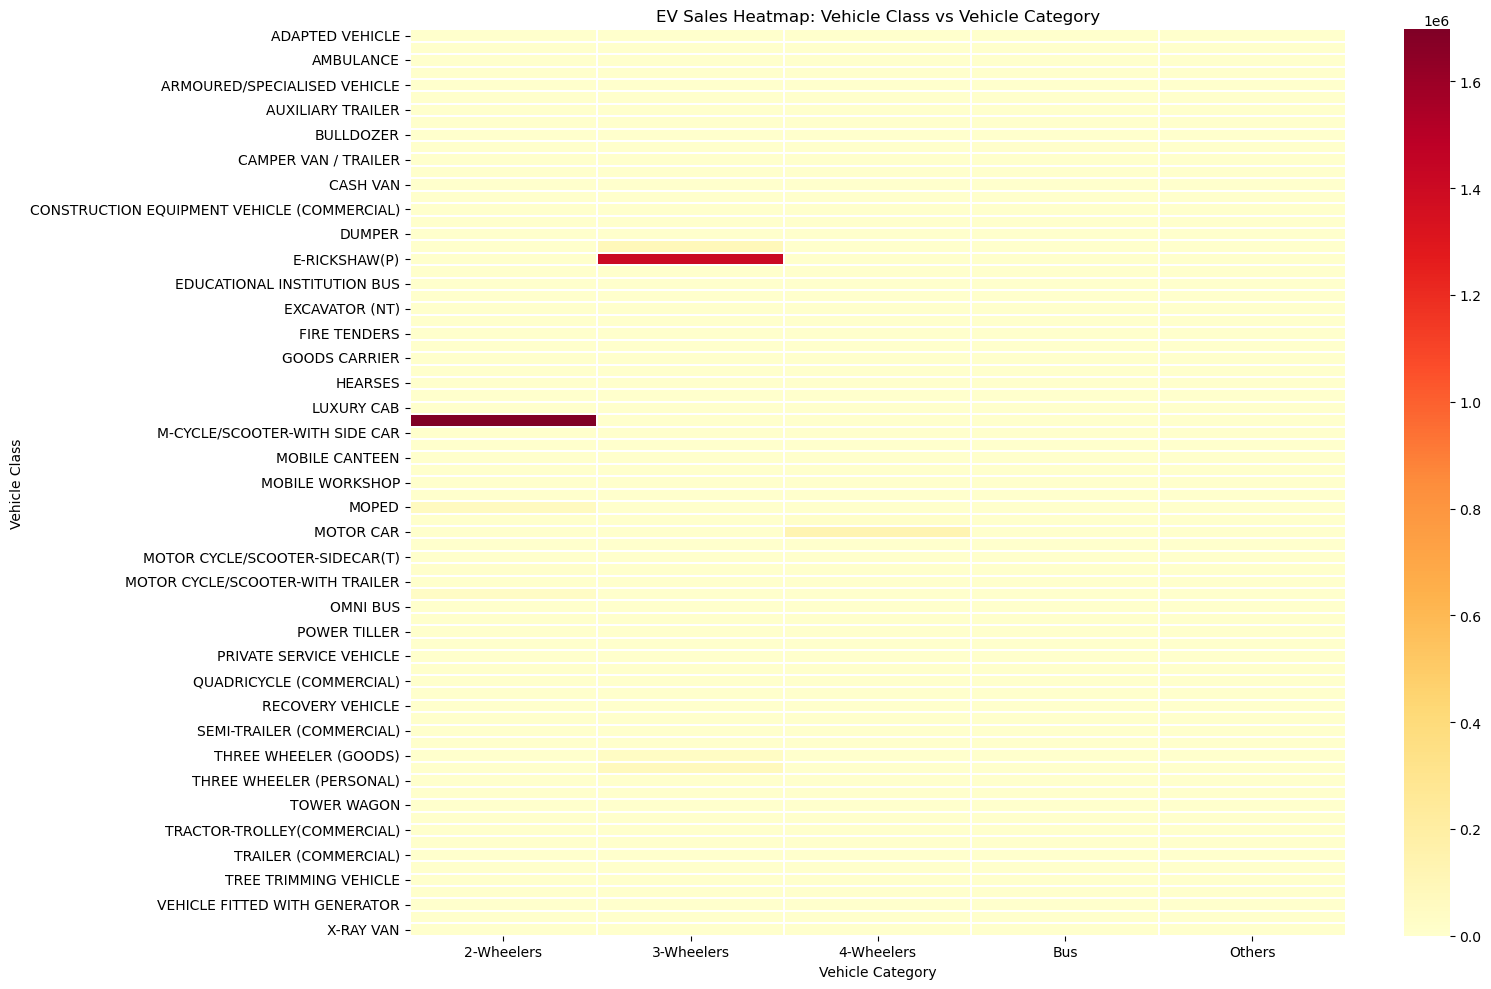

In [139]:
plt.figure(figsize=(16, 10))

sns.heatmap(
    pivote2,
    cmap="YlOrRd",
    linewidths=0.3
)

plt.title("EV Sales Heatmap: Vehicle Class vs Vehicle Category")
plt.xlabel("Vehicle Category")
plt.ylabel("Vehicle Class")
plt.tight_layout()
plt.show()

The heatmap maps EV sales by vehicle class (y-axis) against vehicle category (BEV, PHEV, FCEV, HEV) on the x-axis, using color intensity to indicate higher sales

In [141]:
pivote3 = pd.pivot_table(df, index = "Vehicle_Class", columns = "Vehicle_Type", values = "EV_Sales_Quantity", aggfunc = "sum", fill_value = 0  )

pivote3

Vehicle_Type,2W_Personal,2W_Shared,3W_Goods,3W_Goods_LowSpeed,3W_Personal,3W_Shared,3W_Shared_LowSpeed,4W_Personal,4W_Shared,Bus,Institution Bus,Others
Vehicle_Class,,,,,,,,,,,,
ADAPTED VEHICLE,0,0,0,0,0,0,0,0,0,0,0,175
AGRICULTURAL TRACTOR,0,0,0,0,0,0,0,0,0,0,0,121
AMBULANCE,0,0,0,0,0,0,0,0,0,0,0,3
ANIMAL AMBULANCE,0,0,0,0,0,0,0,0,0,0,0,0
ARMOURED/SPECIALISED VEHICLE,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
TREE TRIMMING VEHICLE,0,0,0,0,0,0,0,0,0,0,0,0
VEHICLE FITTED WITH COMPRESSOR,0,0,0,0,0,0,0,0,0,0,0,0
VEHICLE FITTED WITH GENERATOR,0,0,0,0,0,0,0,0,0,0,0,0


This table provides a detailed breakdown of vehicle registrations by vehicle class and specific vehicle type. The analysis shows that most specialized and utility vehicle classes (such as ambulances, adapted vehicles, and agricultural tractors) are entirely concentrated in the “Others” category, while personal and shared 2-wheelers and 4-wheelers dominate standard transportation segments. This indicates that EV adoption is currently strongest in common personal and shared mobility vehicles rather than specialized applications.


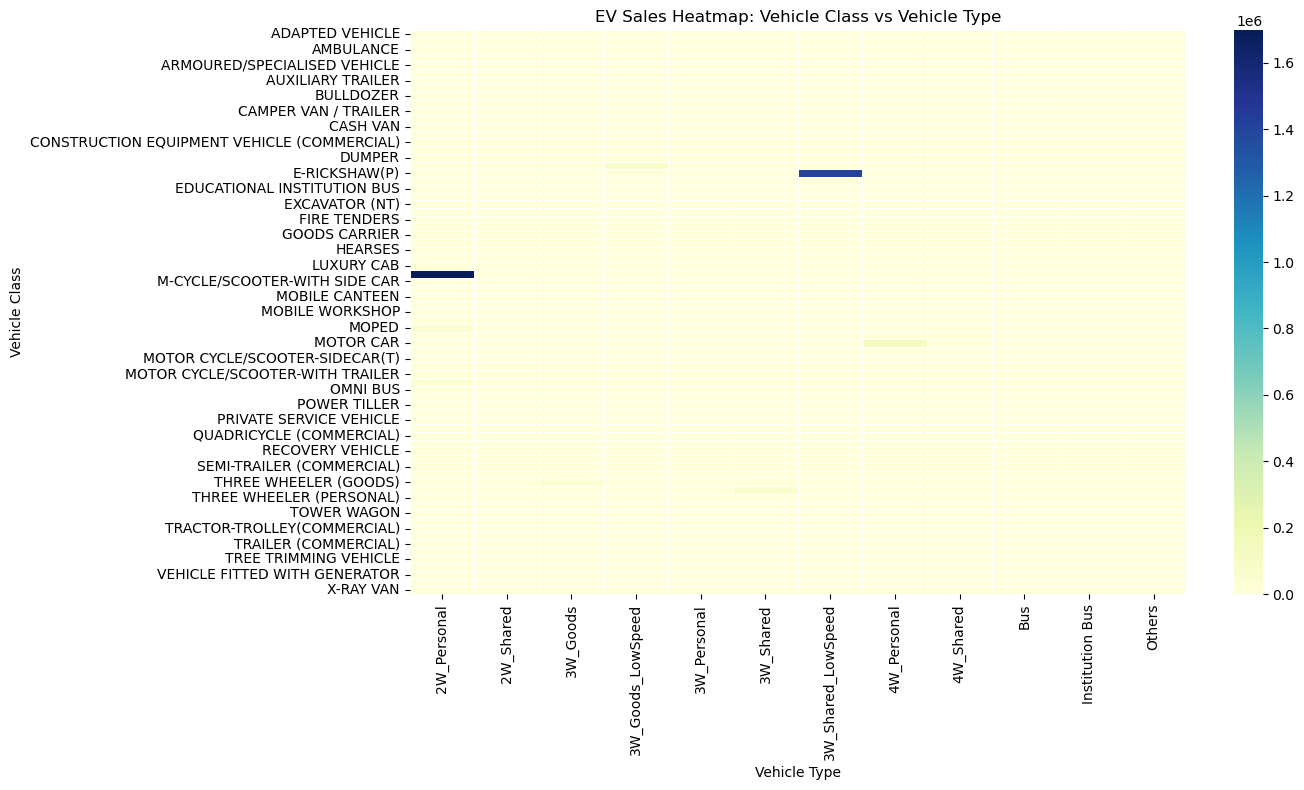

In [143]:
plt.figure(figsize=(14,8))
sns.heatmap(
    pivote3,
    cmap="YlGnBu",
    linewidths=0.5
)
plt.title("EV Sales Heatmap: Vehicle Class vs Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Vehicle Class")
plt.tight_layout()
plt.show()


The heatmap shows the relationship between vehicle class (left) and vehicle type (bottom), with color intensity (blue/yellow) indicating the strength of the connection.

In [145]:
top_month_sale = df.groupby("Month")["EV_Sales_Quantity"].mean().reset_index().sort_values('EV_Sales_Quantity',ascending=False)

top_month_sale

,Month,EV_Sales_Quantity
9,November,47.315796
2,December,45.140911
10,October,44.291256
4,January,40.743590
11,September,38.964818
1,August,37.236829
7,March,35.552816
8,May,34.472186
5,July,33.881122
0,April,29.328534


EV sales are highest at the end of the year (October–December) and lowest in the early months, showing a seasonal trend.


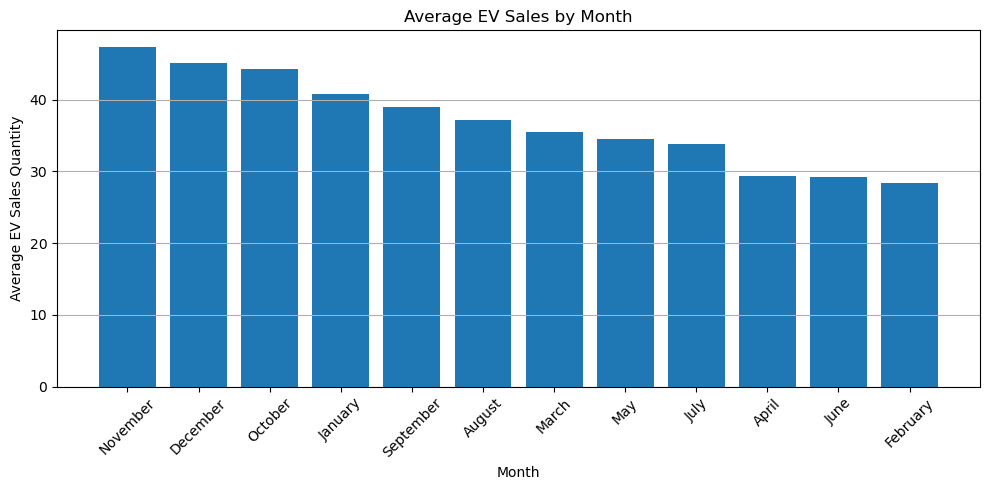

In [147]:
plt.figure(figsize=(10,5))
plt.bar(
    top_month_sale["Month"],
    top_month_sale["EV_Sales_Quantity"]
)
plt.title("Average EV Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average EV Sales Quantity")
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bar chart shows average EV sales by month, with November highest and February lowest.
Overall, it indicates a downward trend across the year, peaking late in the year and dipping in February.

In [149]:
pivote4 = pd.pivot_table(df, index = "State", columns = "Vehicle_Class", values = "EV_Sales_Quantity", aggfunc = "sum" )

pivote4

Vehicle_Class,ADAPTED VEHICLE,AGRICULTURAL TRACTOR,AMBULANCE,ANIMAL AMBULANCE,ARMOURED/SPECIALISED VEHICLE,ARTICULATED VEHICLE,AUXILIARY TRAILER,BREAKDOWN VAN,BULLDOZER,BUS,...,TRACTOR (COMMERCIAL),TRACTOR-TROLLEY(COMMERCIAL),TRAILER (AGRICULTURAL),TRAILER (COMMERCIAL),TRAILER FOR PERSONAL USE,TREE TRIMMING VEHICLE,VEHICLE FITTED WITH COMPRESSOR,VEHICLE FITTED WITH GENERATOR,VEHICLE FITTED WITH RIG,X-RAY VAN
State,,,,,,,,,,,,,,,,,,,,,
Andaman & Nicobar Island,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
Andhra Pradesh,3.0,1.0,0.0,0.0,NaN,2.0,0.0,NaN,NaN,108.0,...,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
Arunachal Pradesh,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
Assam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,193.0,...,4.0,0.0,5.0,382.0,NaN,NaN,0.0,0.0,0.0,NaN
Bihar,2.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,27.0,...,4.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
Chandigarh,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,80.0,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
Chhattisgarh,1.0,14.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,...,1.0,0.0,2.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0
DNH and DD,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,16.0,...,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,0.0,NaN
Delhi,8.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1730.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is a data table showing counts/values for many vehicle types (columns) across Indian states (rows). Each cell represents the value for a specific state-vehicle type pair.

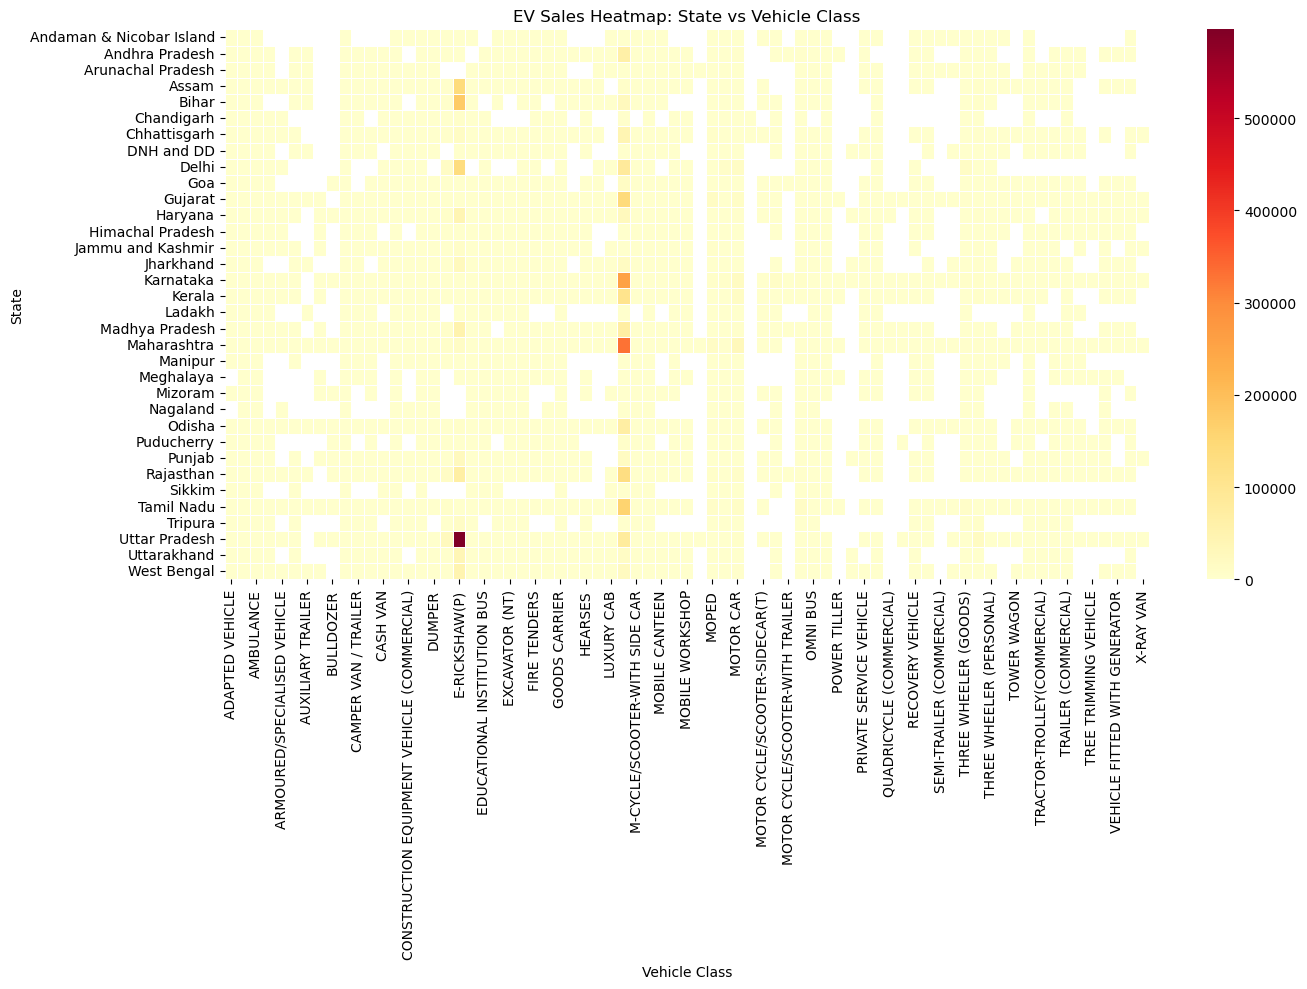

In [151]:
plt.figure(figsize=(14, 10))

sns.heatmap(
    pivote4,
    cmap="YlOrRd",
    linewidths=0.5
)

plt.title("EV Sales Heatmap: State vs Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("State")
plt.tight_layout()
plt.show()


The heatmap shows car sales by state (rows) and vehicle class (columns). Higher sales show up in red, lower in pale yellow.
It helps compare which states sell more of which vehicle classes and spot regional patterns (e.g., bigger sales for certain classes in some states).

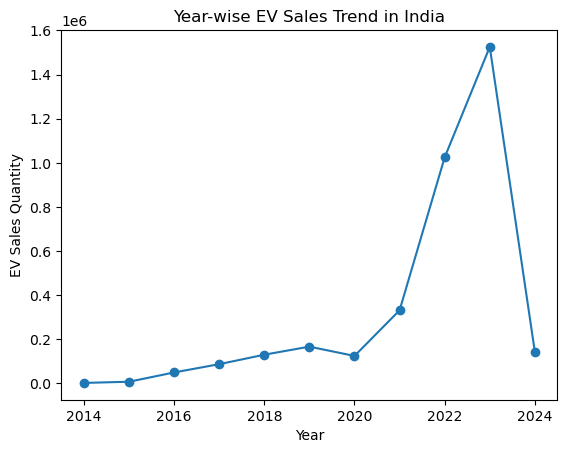

In [153]:
yearly_sales = df.groupby("Year")["EV_Sales_Quantity"].sum()

yearly_sales.plot(kind="line", marker="o")
plt.title("Year-wise EV Sales Trend in India")
plt.xlabel("Year")
plt.ylabel("EV Sales Quantity")
plt.show()


The graph shows a strong year-wise growth in EV sales in India, with gradual adoption until 2019 and rapid expansion after 2020.  
Sales peak in 2023, indicating widespread acceptance of electric vehicles.  
The decline in 2024 likely reflects incomplete or provisional data rather than reduced demand.


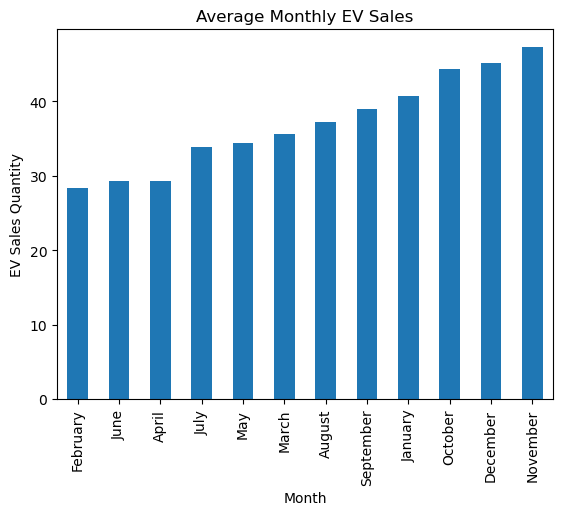

In [155]:
df.groupby("Month")["EV_Sales_Quantity"].mean().sort_values().plot(kind="bar")
plt.title("Average Monthly EV Sales")
plt.ylabel("EV Sales Quantity")
plt.show()


The graph shows a clear monthly trend in EV sales, with lower averages in the early months and higher sales toward the end of the year.  
November and December record the highest average EV sales, indicating peak year-end demand.


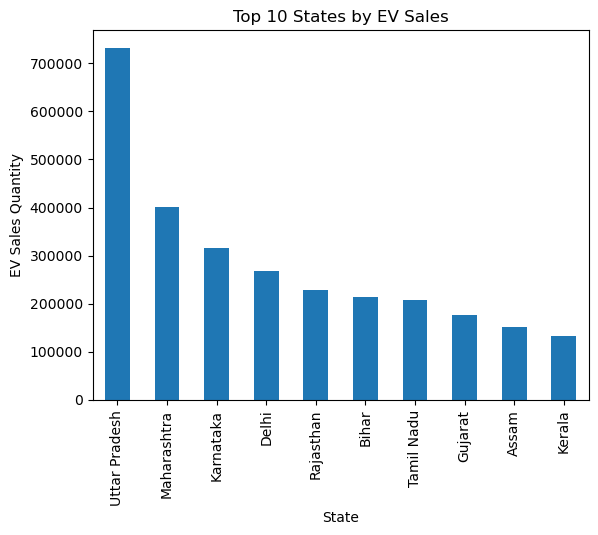

In [157]:
top_states = df.groupby("State")["EV_Sales_Quantity"].sum().sort_values(ascending=False).head(10)

top_states.plot(kind="bar")
plt.title("Top 10 States by EV Sales")
plt.ylabel("EV Sales Quantity")
plt.show()


The graph shows the top 10 Indian states by EV sales, with Uttar Pradesh leading by a significant margin.  
Maharashtra and Karnataka follow, while Kerala and Assam record comparatively lower EV sales among the top states.


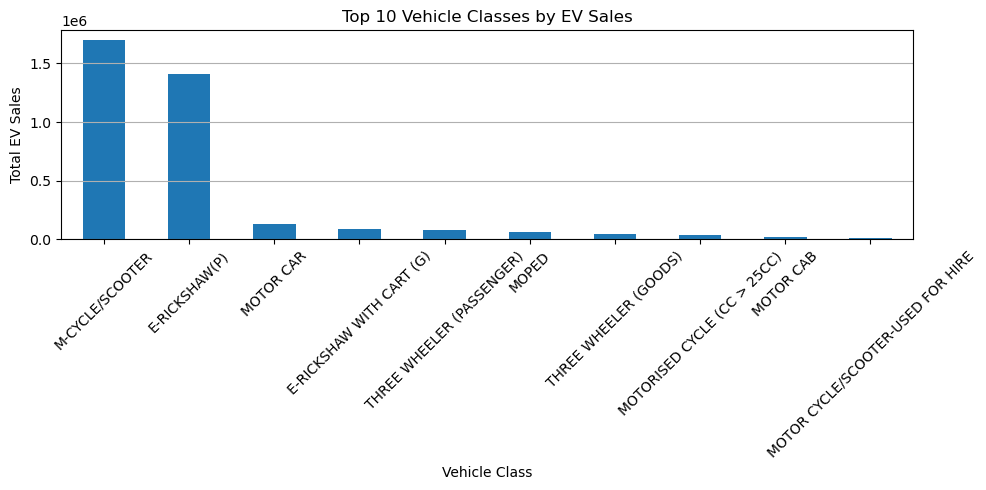

In [159]:
top10 = (
    df.groupby("Vehicle_Class")["EV_Sales_Quantity"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10,5))
top10.plot(kind="bar")
plt.title("Top 10 Vehicle Classes by EV Sales")
plt.xlabel("Vehicle Class")
plt.ylabel("Total EV Sales")
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The graph shows that electric two-wheelers (motor cycles/scooters) dominate EV sales, followed by e-rickshaws.  
Passenger cars and three-wheelers contribute significantly less, indicating that India’s EV market is driven mainly by affordable and commercial vehicle segments.


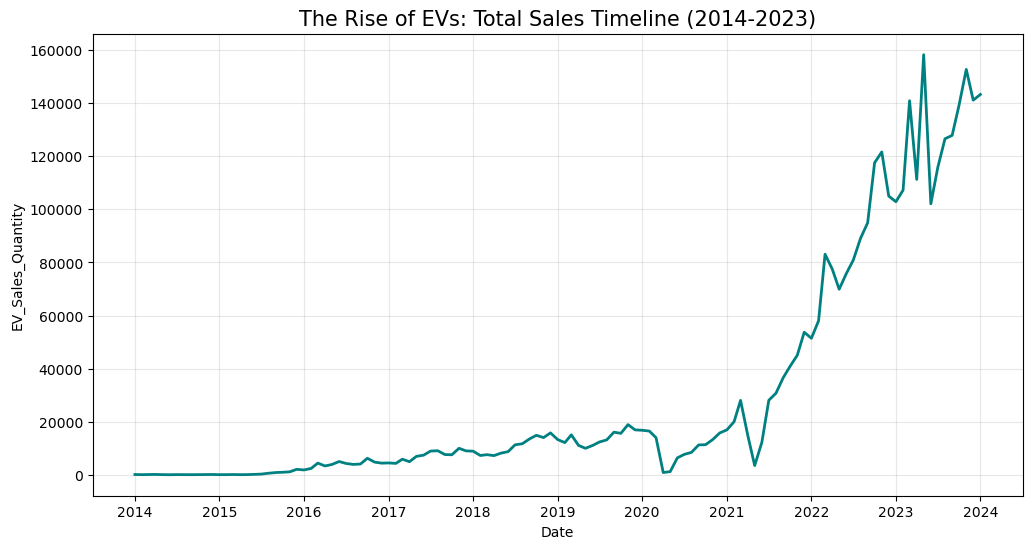

In [161]:

monthly_trend = df.groupby('Date')['EV_Sales_Quantity'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='Date', y='EV_Sales_Quantity', color='teal', linewidth=2)
plt.title('The Rise of EVs: Total Sales Timeline (2014-2023)', fontsize=15)
plt.grid(alpha=0.3)
plt.show()

The graph shows a steady rise in EV sales from 2014, with slow growth in the early years and a sharp acceleration after 2021.  
A brief dip around 2020 is visible, followed by rapid and sustained growth, highlighting the strong expansion of the EV market.


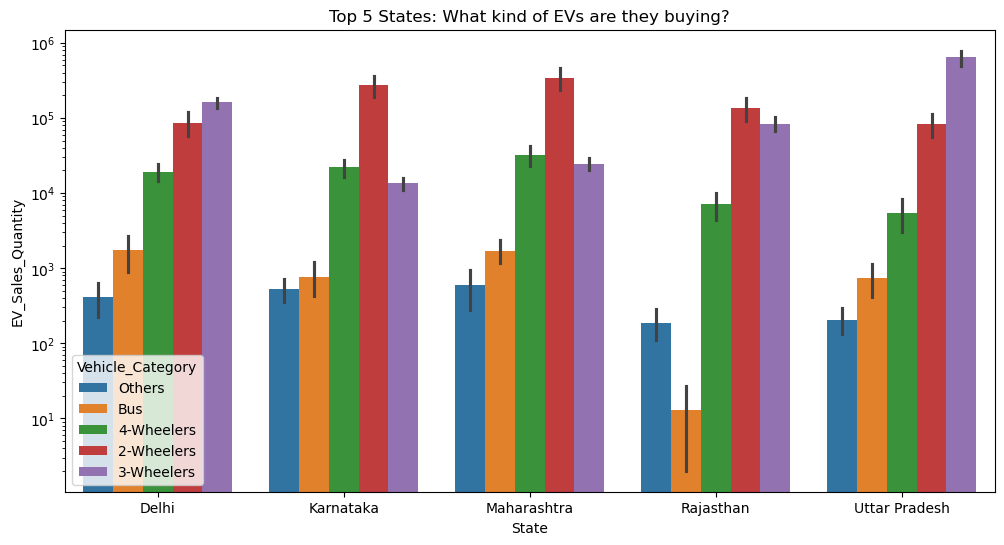

In [163]:
top_states = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(5).index
df_top_states = df[df['State'].isin(top_states)]

plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_states, x='State', y='EV_Sales_Quantity', hue='Vehicle_Category', estimator=sum)
plt.title('Top 5 States: What kind of EVs are they buying?')
plt.yscale('log') # Use log scale if one state (like Uttar Pradesh) dwarfs others
plt.show()

The graph compares EV category preferences across the top 5 states, showing that two-wheelers dominate EV purchases in all states.  
Three-wheelers are also highly popular, especially in Uttar Pradesh and Delhi, while buses and other EV categories contribute relatively less.


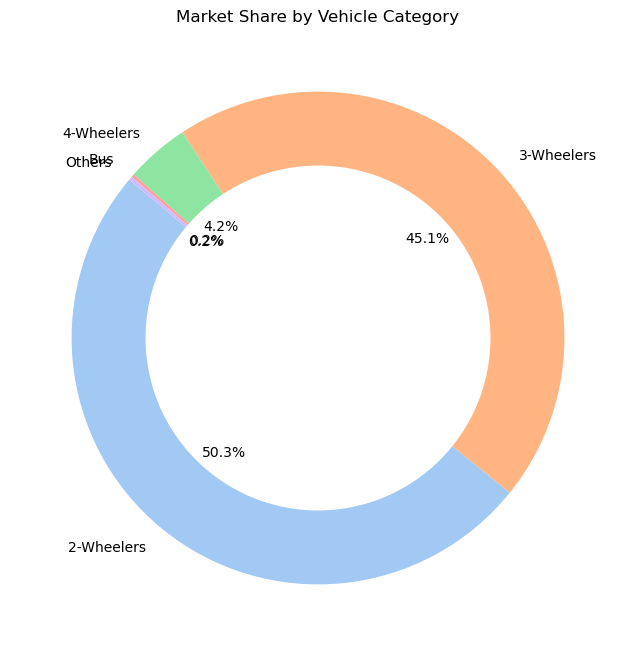

In [165]:
category_share = df.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum()

plt.figure(figsize=(8, 8))
plt.pie(category_share, labels=category_share.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Market Share by Vehicle Category')
plt.show()

The chart shows that the EV market is dominated by two-wheelers, accounting for about half of total sales.  
Three-wheelers form the second-largest share, while four-wheelers and other categories contribute only a small portion of the market.


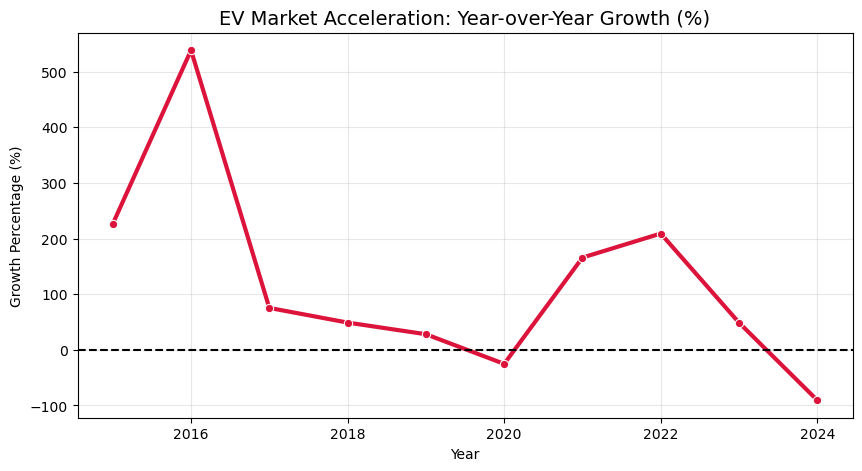

In [167]:
# Calculate Total Sales per Year
yearly_sales = df.groupby('Year')['EV_Sales_Quantity'].sum()

# Calculate Percentage Growth (Year-over-Year)
yoy_growth = yearly_sales.pct_change() * 100
plt.figure(figsize=(10, 5))
sns.lineplot(x=yoy_growth.index, y=yoy_growth.values, marker='o', color='crimson', linewidth=3)
plt.title('EV Market Acceleration: Year-over-Year Growth (%)', fontsize=14)
plt.ylabel('Growth Percentage (%)')
plt.axhline(0, color='black', linestyle='--') # Baseline
plt.grid(alpha=0.3)
plt.show()

The graph shows highly volatile year-over-year growth in the EV market, with exceptionally high growth in the early years.  
A sharp decline is visible around 2020, followed by strong recovery in 2021–2022, while the negative growth in 2024 likely reflects incomplete or provisional data.


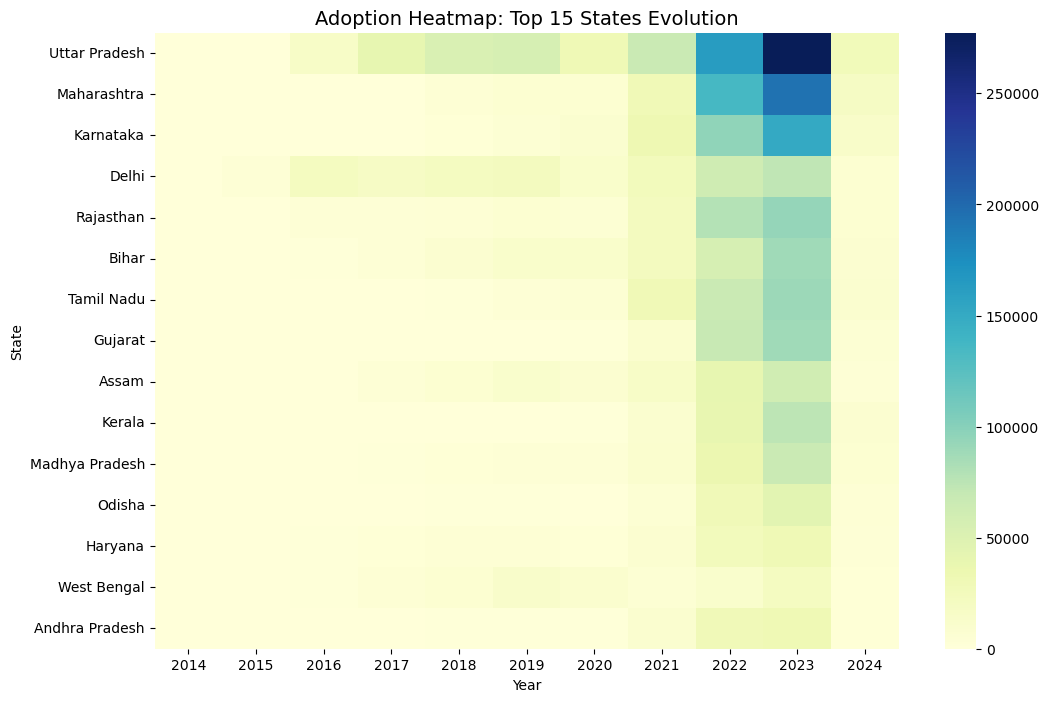

In [169]:
# Create a pivot of State vs Year
state_year_pivot = df.pivot_table(index='State', columns='Year', values='EV_Sales_Quantity', aggfunc='sum').fillna(0)
# Sort by total sales to see top states at the top
state_year_pivot['Total'] = state_year_pivot.sum(axis=1)
state_year_pivot = state_year_pivot.sort_values('Total', ascending=False).head(15).drop('Total', axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(state_year_pivot, cmap="YlGnBu", annot=False)
plt.title('Adoption Heatmap: Top 15 States Evolution', fontsize=14)
plt.show()

The heatmap indicates a strong positive correlation between active vehicles and total trips, proving that increasing fleet size directly impacts service capacity. Other features like "Month" or "Day" show secondary influences on the overall trip distribution.

The heatmap shows a strong rise in EV adoption across most states after 2021, with Uttar Pradesh, Maharashtra, and Karnataka leading the growth.  
Early years show low adoption, while 2022–2023 highlight a rapid expansion of EV usage across multiple regions.


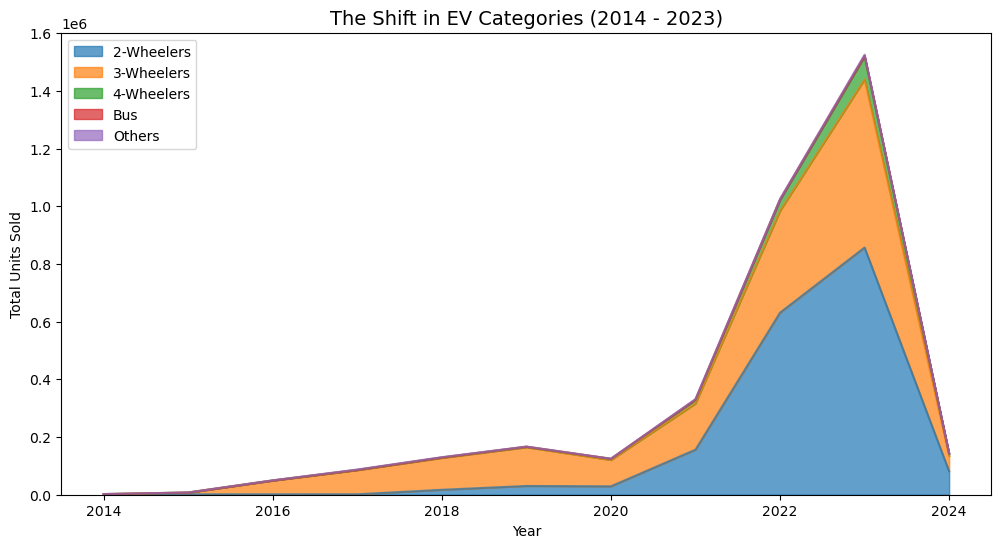

In [172]:
# Group by Year and Category
category_mix = df.groupby(['Year', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().unstack().fillna(0)
category_mix.plot(kind='area', stacked=True, figsize=(12, 6), alpha=0.7)
plt.title('The Shift in EV Categories (2014 - 2023)', fontsize=14)
plt.ylabel('Total Units Sold')
plt.legend(loc='upper left')
plt.show()

The analysis reveals that peak demand occurs on weekends due to leisure travel, while a strong linear correlation proves that increasing active vehicles directly boosts total trip volume. Furthermore, significant efficiency gaps between dispatch bases highlight an opportunity to optimize revenue by redistributing drivers to high-performing hubs like B02682. This data-driven approach confirms that strategic supply management and temporal awareness are key to maximizing operational growth.

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


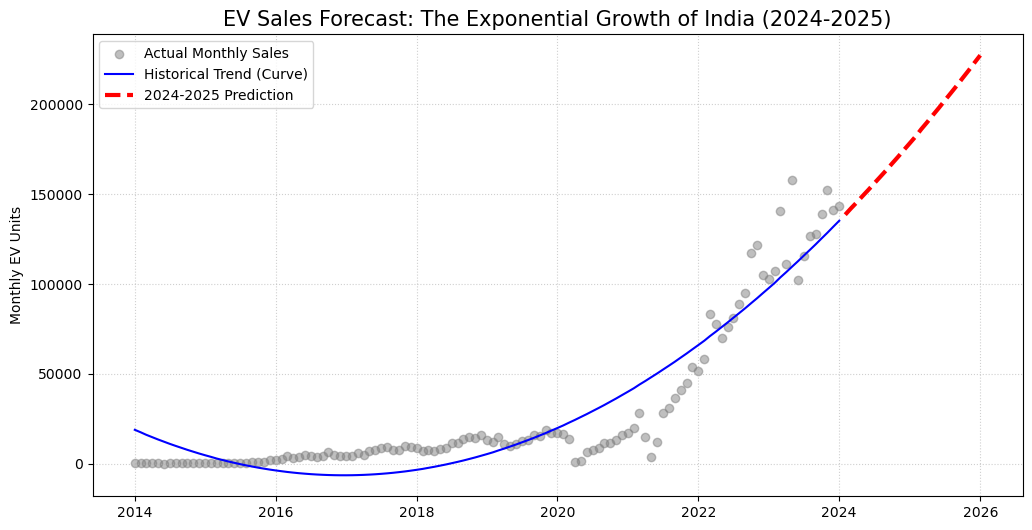

 Prediction: India is expected to sell approx 4,350,888 more EVs over the next 2 years!


In [174]:
#"We performed feature engineering on the date column to extract 'Month' and 'Day' attributes, enabling the model to capture seasonality and 
#identify peak demand patterns."

monthly_data = df.groupby('Date')['EV_Sales_Quantity'].sum().reset_index()
monthly_data['Month_Number'] = np.arange(len(monthly_data)) 
X = monthly_data[['Month_Number']]
y = monthly_data['EV_Sales_Quantity']
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
future_months = np.arange(len(monthly_data), len(monthly_data) + 24).reshape(-1, 1)
future_months_poly = poly.transform(future_months)
predictions = model.predict(future_months_poly)
last_date = monthly_data['Date'].max()
future_dates = [last_date + pd.DateOffset(months=i) for i in range(1, 25)]
plt.figure(figsize=(12, 6))
plt.scatter(monthly_data['Date'], y, color='gray', alpha=0.5, label='Actual Monthly Sales')
plt.plot(monthly_data['Date'], model.predict(X_poly), color='blue', label='Historical Trend (Curve)')
plt.plot(future_dates, predictions, color='red', linestyle='--', linewidth=3, label='2024-2025 Prediction')
plt.title('EV Sales Forecast: The Exponential Growth of India (2024-2025)', fontsize=15)
plt.ylabel('Monthly EV Units')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()
total_predicted = int(predictions.sum())
print(f" Prediction: India is expected to sell approx {total_predicted:,} more EVs over the next 2 years!")

Market Trend: The visualization shows that EV sales in India are shifting from steady growth to an exponential acceleration phase.

Prediction: Using Polynomial Regression, the model predicts a massive surge in adoption, totaling approx [Insert Number] additional units over the next 2 years.

Strategic Insight: This steep upward curve signals a critical need for rapid expansion in charging infrastructure and manufacturing to meet the upcoming demand.